In [2]:
import pandas as pd
import numpy as np
import keras
from datetime import datetime
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from keras import losses
from keras.constraints import maxnorm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import seaborn as sns
sns.set()
from collections import Counter
from scipy.stats import uniform
from scipy.stats import randint
import shap
from sklearn.metrics import mean_squared_error, make_scorer, accuracy_score, f1_score, classification_report
import pickle
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from commons import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Audio
#sound_file = 'beep.wav'
from keras.callbacks import *

### Litecoin

In [3]:
regs = pd.read_csv("ltc_reg.csv")
btc = pd.read_csv("litecoin_Data.csv")
for i in range(len(btc['Date'])):
    btc['Date'][i]  =  datetime.strptime(btc['Date'][i], '%Y/%m/%d')

btc = btc.set_index("Date")


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
btcData = btc[regs.columns]

In [5]:
btcData['returns'] = btcData['priceUSD'].pct_change()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
Data = btcData.drop(columns=['priceUSD'])
Data = Data[1:]

In [7]:
Data

,activeaddresses30std,activeaddresses30var,activeaddresses7trx,difficulty,difficulty30mom,difficulty30trx,difficulty90mom,difficulty90roc,difficulty90rsi,difficulty90trx,...,sentinusd30emaUSD,sentinusd30smaUSD,sentinusd30wmaUSD,sentinusd90emaUSD,sentinusd90varUSD,sentinusd90wmaUSD,sentinusdUSD,top100cap,transactionvalueUSD,returns
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-02,7666,14691594,0.296,51718,2875.000,0.146,3694.0,7.693,55.143,0.073,...,13119990,14447549,13084361,15062343,9.207781e+13,15267519,6145265,49.907,1299.0,-0.004836
2016-01-03,7553,14263642,0.531,50653,1810.000,0.152,2764.0,5.771,53.920,0.074,...,12661408,14247155,12540130,14863434,9.237091e+13,15058214,6011974,49.914,1650.0,-0.008005
2016-01-04,6990,12215979,0.492,50158,1315.000,0.156,2268.0,4.737,53.364,0.074,...,12160118,13934412,11936534,14644269,9.336173e+13,14824650,4891418,49.963,1112.0,0.004323
2016-01-05,7207,12983796,-0.176,50158,436.688,0.159,1731.0,3.574,53.364,0.075,...,11733962,13588124,11395907,14444498,9.368327e+13,14607077,5554693,49.976,1505.0,-0.004878
2016-01-06,7368,13572232,-0.950,51299,1184.000,0.161,1473.0,2.956,54.471,0.075,...,11652530,13295257,11194853,14357186,9.312956e+13,14497960,10471777,49.916,3469.0,-0.004902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,55298,764459612,-0.329,19352505,2570167.000,0.274,3935133.0,25.524,61.809,0.095,...,1038289555,1236990379,1125469305,906646434,7.982758e+17,1088633253,361588723,44.670,30828.0,-0.001286
2022-11-25,55854,779921846,-0.097,19996996,3214659.000,0.279,4316584.0,27.529,63.623,0.097,...,990339490,1228280282,1064699832,893205052,7.936632e+17,1076450910,295063546,44.667,37548.0,-0.023929
2022-11-26,55376,766634614,-0.101,19996996,3214659.000,0.284,4316584.0,27.529,63.623,0.099,...,939695376,1214390963,998704699,878087484,7.902356e+17,1062224912,205355717,44.746,35847.0,0.012488


In [8]:
Data

,activeaddresses30std,activeaddresses30var,activeaddresses7trx,difficulty,difficulty30mom,difficulty30trx,difficulty90mom,difficulty90roc,difficulty90rsi,difficulty90trx,...,sentinusd30emaUSD,sentinusd30smaUSD,sentinusd30wmaUSD,sentinusd90emaUSD,sentinusd90varUSD,sentinusd90wmaUSD,sentinusdUSD,top100cap,transactionvalueUSD,returns
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-02,7666,14691594,0.296,51718,2875.000,0.146,3694.0,7.693,55.143,0.073,...,13119990,14447549,13084361,15062343,9.207781e+13,15267519,6145265,49.907,1299.0,-0.004836
2016-01-03,7553,14263642,0.531,50653,1810.000,0.152,2764.0,5.771,53.920,0.074,...,12661408,14247155,12540130,14863434,9.237091e+13,15058214,6011974,49.914,1650.0,-0.008005
2016-01-04,6990,12215979,0.492,50158,1315.000,0.156,2268.0,4.737,53.364,0.074,...,12160118,13934412,11936534,14644269,9.336173e+13,14824650,4891418,49.963,1112.0,0.004323
2016-01-05,7207,12983796,-0.176,50158,436.688,0.159,1731.0,3.574,53.364,0.075,...,11733962,13588124,11395907,14444498,9.368327e+13,14607077,5554693,49.976,1505.0,-0.004878
2016-01-06,7368,13572232,-0.950,51299,1184.000,0.161,1473.0,2.956,54.471,0.075,...,11652530,13295257,11194853,14357186,9.312956e+13,14497960,10471777,49.916,3469.0,-0.004902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,55298,764459612,-0.329,19352505,2570167.000,0.274,3935133.0,25.524,61.809,0.095,...,1038289555,1236990379,1125469305,906646434,7.982758e+17,1088633253,361588723,44.670,30828.0,-0.001286
2022-11-25,55854,779921846,-0.097,19996996,3214659.000,0.279,4316584.0,27.529,63.623,0.097,...,990339490,1228280282,1064699832,893205052,7.936632e+17,1076450910,295063546,44.667,37548.0,-0.023929
2022-11-26,55376,766634614,-0.101,19996996,3214659.000,0.284,4316584.0,27.529,63.623,0.099,...,939695376,1214390963,998704699,878087484,7.902356e+17,1062224912,205355717,44.746,35847.0,0.012488


In [9]:
Data 

,activeaddresses30std,activeaddresses30var,activeaddresses7trx,difficulty,difficulty30mom,difficulty30trx,difficulty90mom,difficulty90roc,difficulty90rsi,difficulty90trx,...,sentinusd30emaUSD,sentinusd30smaUSD,sentinusd30wmaUSD,sentinusd90emaUSD,sentinusd90varUSD,sentinusd90wmaUSD,sentinusdUSD,top100cap,transactionvalueUSD,returns
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-02,7666,14691594,0.296,51718,2875.000,0.146,3694.0,7.693,55.143,0.073,...,13119990,14447549,13084361,15062343,9.207781e+13,15267519,6145265,49.907,1299.0,-0.004836
2016-01-03,7553,14263642,0.531,50653,1810.000,0.152,2764.0,5.771,53.920,0.074,...,12661408,14247155,12540130,14863434,9.237091e+13,15058214,6011974,49.914,1650.0,-0.008005
2016-01-04,6990,12215979,0.492,50158,1315.000,0.156,2268.0,4.737,53.364,0.074,...,12160118,13934412,11936534,14644269,9.336173e+13,14824650,4891418,49.963,1112.0,0.004323
2016-01-05,7207,12983796,-0.176,50158,436.688,0.159,1731.0,3.574,53.364,0.075,...,11733962,13588124,11395907,14444498,9.368327e+13,14607077,5554693,49.976,1505.0,-0.004878
2016-01-06,7368,13572232,-0.950,51299,1184.000,0.161,1473.0,2.956,54.471,0.075,...,11652530,13295257,11194853,14357186,9.312956e+13,14497960,10471777,49.916,3469.0,-0.004902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,55298,764459612,-0.329,19352505,2570167.000,0.274,3935133.0,25.524,61.809,0.095,...,1038289555,1236990379,1125469305,906646434,7.982758e+17,1088633253,361588723,44.670,30828.0,-0.001286
2022-11-25,55854,779921846,-0.097,19996996,3214659.000,0.279,4316584.0,27.529,63.623,0.097,...,990339490,1228280282,1064699832,893205052,7.936632e+17,1076450910,295063546,44.667,37548.0,-0.023929
2022-11-26,55376,766634614,-0.101,19996996,3214659.000,0.284,4316584.0,27.529,63.623,0.099,...,939695376,1214390963,998704699,878087484,7.902356e+17,1062224912,205355717,44.746,35847.0,0.012488


In [10]:
# divide X and Y
X = Data.iloc[:,0:]
#Y = Data['returns']   # 用returns的话就用这一行，然后把下一行comment掉
Y = btcData['priceUSD'][1:] # 反之亦然

In [11]:
X.head(3)

,activeaddresses30std,activeaddresses30var,activeaddresses7trx,difficulty,difficulty30mom,difficulty30trx,difficulty90mom,difficulty90roc,difficulty90rsi,difficulty90trx,...,sentinusd30emaUSD,sentinusd30smaUSD,sentinusd30wmaUSD,sentinusd90emaUSD,sentinusd90varUSD,sentinusd90wmaUSD,sentinusdUSD,top100cap,transactionvalueUSD,returns
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-02,7666,14691594,0.296,51718,2875.0,0.146,3694.0,7.693,55.143,0.073,...,13119990,14447549,13084361,15062343,9.207781e+13,15267519,6145265,49.907,1299.0,-0.004836
2016-01-03,7553,14263642,0.531,50653,1810.0,0.152,2764.0,5.771,53.920,0.074,...,12661408,14247155,12540130,14863434,9.237091e+13,15058214,6011974,49.914,1650.0,-0.008005
2016-01-04,6990,12215979,0.492,50158,1315.0,0.156,2268.0,4.737,53.364,0.074,...,12160118,13934412,11936534,14644269,9.336173e+13,14824650,4891418,49.963,1112.0,0.004323


In [12]:
# Split into three data sets
X_train = X['2016-01-01':'2019-12-31']
X_val = X['2020-01-01':'2021-05-31']
X_test = X['2021-06-01':'2023-01-01']

Y_train = Y['2016-01-01':'2019-12-31']
Y_val = Y['2020-01-01':'2021-05-31']
Y_test = Y['2021-06-01':'2023-01-01']

In [13]:
estimators=[]
estimators.append(['mixmax',MinMaxScaler()])
estimators.append(['robust',RobustScaler()])
scale=Pipeline(estimators,verbose=True)
scale.fit(X_train)

[Pipeline] ............ (step 1 of 2) Processing mixmax, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing robust, total=   0.0s


Pipeline(steps=[('mixmax', MinMaxScaler()), ['robust', RobustScaler()]],
         verbose=True)

In [14]:
X_train=scale.transform(X_train)
X_test=scale.transform(X_test)
X_val = scale.transform(X_val)

In [15]:
def lr_schedule(epoch):
    """Learning Rate Schedule
    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.
    # Arguments
        epoch (int): The number of epochs
    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [16]:
from keras import regularizers
# define neural network model
shape=X.shape[1]
def sequential_model(initializer='normal', activation='relu', neurons=300, NUM_FEATURES=shape):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_shape=(NUM_FEATURES,), kernel_initializer=initializer, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation=activation))
    # Compile model
    adam=keras.optimizers.adam(lr=lr_schedule(0), amsgrad=True)
    #sgd=keras.optimizers.SGD(learning_rate=0.08, momentum=0.9, nesterov=False)
    model.compile(loss='logcosh', optimizer=adam, metrics=['mae'])
    return model

In [17]:
#mcp_save = ModelCheckpoint('trained_models/ANN_reg_seven_new.hdf5', save_best_only=True, monitor='val_loss', mode='auto')
#earlyStopping = EarlyStopping(monitor='val_loss', patience=100,verbose=1, mode='auto')

In [18]:
regressor=KerasRegressor(build_fn=sequential_model,epochs=1000,verbose=1, shuffle=True,use_multiprocessing=True)

In [19]:
regressor.fit(X_train,Y_train,validation_data=(X_val, Y_val))
#Audio(sound_file,autoplay=True)

2022-11-30 18:44:54.219418: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 18:44:54.221420: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Learning rate:  0.001
Train on 1460 samples, validate on 517 samples
Epoch 1/1000
1460/1460 [==============================] - 1s 772us/step - loss: 28.1134 - mae: 28.7478 - val_loss: 35.4941 - val_mae: 36.1751
Epoch 2/1000
1460/1460 [==============================] - 0s 279us/step - loss: 7.6345 - mae: 8.2008 - val_loss: 27.7211 - val_mae: 28.4095
Epoch 3/1000
1460/1460 [==============================] - 0s 284us/step - loss: 5.1603 - mae: 5.6967 - val_loss: 21.3254 - val_mae: 22.0095
Epoch 4/1000
1460/1460 [==============================] - 0s 278us/step - loss: 3.7946 - mae: 4.3219 - val_loss: 22.1853 - val_mae: 22.8685
Epoch 5/1000
1460/1460 [==============================] - 0s 270us/step - loss: 2.9645 - mae: 3.4794 - val_loss: 14.2213 - val_mae: 14.8699
Epoch 6/1000
1460/1460 [==============================] - 0s 277us/step - loss: 2.5442 - mae: 3.0394 - val_loss: 13.2704 - val_mae: 13.9187
Epoch 7/1000
1460/1460 [==============================] - 0s 274us/step - loss: 2.3148 - 

1460/1460 [==============================] - 0s 269us/step - loss: 1.3016 - mae: 1.7255 - val_loss: 4.3343 - val_mae: 4.9696
Epoch 60/1000
1460/1460 [==============================] - 0s 270us/step - loss: 1.1180 - mae: 1.5357 - val_loss: 4.3954 - val_mae: 4.9964
Epoch 61/1000
1460/1460 [==============================] - 0s 268us/step - loss: 1.0733 - mae: 1.4606 - val_loss: 4.1227 - val_mae: 4.7151
Epoch 62/1000
1460/1460 [==============================] - 0s 269us/step - loss: 0.9713 - mae: 1.3640 - val_loss: 4.8420 - val_mae: 5.4748
Epoch 63/1000
1460/1460 [==============================] - 0s 273us/step - loss: 0.8956 - mae: 1.2689 - val_loss: 3.8420 - val_mae: 4.4347
Epoch 64/1000
1460/1460 [==============================] - 0s 269us/step - loss: 0.8717 - mae: 1.2517 - val_loss: 3.7065 - val_mae: 4.3161
Epoch 65/1000
1460/1460 [==============================] - 0s 270us/step - loss: 1.0251 - mae: 1.4133 - val_loss: 3.2325 - val_mae: 3.8462
Epoch 66/1000
1460/1460 [================

Epoch 118/1000
1460/1460 [==============================] - 0s 269us/step - loss: 0.6792 - mae: 1.0385 - val_loss: 2.6967 - val_mae: 3.2581
Epoch 119/1000
1460/1460 [==============================] - 0s 264us/step - loss: 0.6109 - mae: 0.9690 - val_loss: 2.6431 - val_mae: 3.2114
Epoch 120/1000
1460/1460 [==============================] - 0s 274us/step - loss: 0.5249 - mae: 0.8534 - val_loss: 3.0554 - val_mae: 3.6403
Epoch 121/1000
1460/1460 [==============================] - 0s 280us/step - loss: 1.0327 - mae: 1.4159 - val_loss: 2.9913 - val_mae: 3.5674
Epoch 122/1000
1460/1460 [==============================] - 0s 260us/step - loss: 0.7628 - mae: 1.1138 - val_loss: 3.0690 - val_mae: 3.6750
Epoch 123/1000
1460/1460 [==============================] - 0s 261us/step - loss: 0.5483 - mae: 0.8716 - val_loss: 3.2114 - val_mae: 3.8135
Epoch 124/1000
1460/1460 [==============================] - 1s 694us/step - loss: 0.6762 - mae: 1.0090 - val_loss: 2.3630 - val_mae: 2.9209
Epoch 125/1000
1460/

1460/1460 [==============================] - 0s 271us/step - loss: 0.6411 - mae: 0.9751 - val_loss: 2.2562 - val_mae: 2.8042
Epoch 177/1000
1460/1460 [==============================] - 0s 271us/step - loss: 0.7250 - mae: 1.0822 - val_loss: 2.9352 - val_mae: 3.5141
Epoch 178/1000
1460/1460 [==============================] - 0s 271us/step - loss: 0.8165 - mae: 1.1722 - val_loss: 3.3622 - val_mae: 3.9355
Epoch 179/1000
1460/1460 [==============================] - 0s 266us/step - loss: 0.9830 - mae: 1.3640 - val_loss: 2.3680 - val_mae: 2.9111
Epoch 180/1000
1460/1460 [==============================] - 0s 268us/step - loss: 0.6731 - mae: 1.0308 - val_loss: 2.6302 - val_mae: 3.1835
Epoch 181/1000
1460/1460 [==============================] - 0s 270us/step - loss: 0.8136 - mae: 1.1820 - val_loss: 3.0214 - val_mae: 3.6160
Epoch 182/1000
1460/1460 [==============================] - 0s 265us/step - loss: 0.6108 - mae: 0.9542 - val_loss: 2.2965 - val_mae: 2.8467
Epoch 183/1000
1460/1460 [=========

1460/1460 [==============================] - 0s 270us/step - loss: 0.5080 - mae: 0.8140 - val_loss: 2.5215 - val_mae: 3.0808
Epoch 235/1000
1460/1460 [==============================] - 0s 274us/step - loss: 0.4376 - mae: 0.7341 - val_loss: 2.5331 - val_mae: 3.0778
Epoch 236/1000
1460/1460 [==============================] - 0s 274us/step - loss: 0.3619 - mae: 0.6385 - val_loss: 2.9697 - val_mae: 3.5648
Epoch 237/1000
1460/1460 [==============================] - 0s 271us/step - loss: 0.4644 - mae: 0.7604 - val_loss: 2.4240 - val_mae: 2.9704
Epoch 238/1000
1460/1460 [==============================] - 0s 263us/step - loss: 0.4615 - mae: 0.7566 - val_loss: 2.5594 - val_mae: 3.1037
Epoch 239/1000
1460/1460 [==============================] - 0s 269us/step - loss: 0.7802 - mae: 1.1305 - val_loss: 2.9728 - val_mae: 3.5436
Epoch 240/1000
1460/1460 [==============================] - 0s 270us/step - loss: 0.6304 - mae: 0.9538 - val_loss: 3.2489 - val_mae: 3.8590
Epoch 241/1000
1460/1460 [=========

1460/1460 [==============================] - 0s 283us/step - loss: 0.7807 - mae: 1.1363 - val_loss: 2.3119 - val_mae: 2.8905
Epoch 293/1000
1460/1460 [==============================] - 0s 278us/step - loss: 0.4728 - mae: 0.7945 - val_loss: 2.2359 - val_mae: 2.7953
Epoch 294/1000
1460/1460 [==============================] - 0s 266us/step - loss: 0.4735 - mae: 0.7886 - val_loss: 3.6369 - val_mae: 4.2687
Epoch 295/1000
1460/1460 [==============================] - 0s 272us/step - loss: 0.4495 - mae: 0.7711 - val_loss: 2.0843 - val_mae: 2.6203
Epoch 296/1000
1460/1460 [==============================] - 0s 267us/step - loss: 0.5376 - mae: 0.8489 - val_loss: 3.1131 - val_mae: 3.7296
Epoch 297/1000
1460/1460 [==============================] - 0s 268us/step - loss: 0.5109 - mae: 0.8255 - val_loss: 2.5350 - val_mae: 3.0989
Epoch 298/1000
1460/1460 [==============================] - 0s 267us/step - loss: 0.6770 - mae: 1.0232 - val_loss: 2.7661 - val_mae: 3.3762
Epoch 299/1000
1460/1460 [=========

1460/1460 [==============================] - 0s 267us/step - loss: 0.5287 - mae: 0.8473 - val_loss: 2.3522 - val_mae: 2.8997
Epoch 351/1000
1460/1460 [==============================] - 0s 267us/step - loss: 0.3933 - mae: 0.6844 - val_loss: 2.5677 - val_mae: 3.1491
Epoch 352/1000
1460/1460 [==============================] - 0s 300us/step - loss: 0.3755 - mae: 0.6623 - val_loss: 2.4210 - val_mae: 2.9732
Epoch 353/1000
1460/1460 [==============================] - 0s 277us/step - loss: 0.3434 - mae: 0.6103 - val_loss: 2.1483 - val_mae: 2.6819
Epoch 354/1000
1460/1460 [==============================] - 0s 274us/step - loss: 0.3210 - mae: 0.5906 - val_loss: 2.2369 - val_mae: 2.7841
Epoch 355/1000
1460/1460 [==============================] - 0s 268us/step - loss: 0.4875 - mae: 0.7883 - val_loss: 2.3871 - val_mae: 2.9382
Epoch 356/1000
1460/1460 [==============================] - 0s 299us/step - loss: 0.5630 - mae: 0.8768 - val_loss: 2.2408 - val_mae: 2.7906
Epoch 357/1000
1460/1460 [=========

1460/1460 [==============================] - 0s 271us/step - loss: 0.3815 - mae: 0.6685 - val_loss: 1.9401 - val_mae: 2.4834
Epoch 409/1000
1460/1460 [==============================] - 0s 270us/step - loss: 0.3917 - mae: 0.6688 - val_loss: 2.3752 - val_mae: 2.9425
Epoch 410/1000
1460/1460 [==============================] - 0s 273us/step - loss: 0.3506 - mae: 0.6320 - val_loss: 2.3240 - val_mae: 2.8773
Epoch 411/1000
1460/1460 [==============================] - 0s 268us/step - loss: 0.5373 - mae: 0.8604 - val_loss: 2.1747 - val_mae: 2.7360
Epoch 412/1000
1460/1460 [==============================] - 0s 268us/step - loss: 0.5770 - mae: 0.9173 - val_loss: 2.3990 - val_mae: 2.9744
Epoch 413/1000
1460/1460 [==============================] - 0s 266us/step - loss: 0.4266 - mae: 0.7301 - val_loss: 2.4409 - val_mae: 2.9986
Epoch 414/1000
1460/1460 [==============================] - 0s 271us/step - loss: 0.4631 - mae: 0.7639 - val_loss: 2.0554 - val_mae: 2.6028
Epoch 415/1000
1460/1460 [=========

1460/1460 [==============================] - 0s 263us/step - loss: 0.6865 - mae: 1.0316 - val_loss: 2.8982 - val_mae: 3.5072
Epoch 467/1000
1460/1460 [==============================] - 0s 267us/step - loss: 0.3571 - mae: 0.6200 - val_loss: 2.1603 - val_mae: 2.6981
Epoch 468/1000
1460/1460 [==============================] - 0s 274us/step - loss: 0.2447 - mae: 0.4929 - val_loss: 2.4186 - val_mae: 2.9915
Epoch 469/1000
1460/1460 [==============================] - 0s 264us/step - loss: 0.4367 - mae: 0.7203 - val_loss: 2.4717 - val_mae: 3.0519
Epoch 470/1000
1460/1460 [==============================] - 0s 269us/step - loss: 0.5763 - mae: 0.9113 - val_loss: 2.5951 - val_mae: 3.1574
Epoch 471/1000
1460/1460 [==============================] - 0s 271us/step - loss: 0.6999 - mae: 1.0421 - val_loss: 2.1663 - val_mae: 2.7152
Epoch 472/1000
1460/1460 [==============================] - 0s 277us/step - loss: 0.5748 - mae: 0.9201 - val_loss: 3.1458 - val_mae: 3.7806
Epoch 473/1000
1460/1460 [=========

1460/1460 [==============================] - 0s 274us/step - loss: 0.2771 - mae: 0.5338 - val_loss: 2.6374 - val_mae: 3.2177
Epoch 525/1000
1460/1460 [==============================] - 0s 269us/step - loss: 0.2999 - mae: 0.5477 - val_loss: 2.2195 - val_mae: 2.7759
Epoch 526/1000
1460/1460 [==============================] - 0s 272us/step - loss: 0.3795 - mae: 0.6413 - val_loss: 2.3486 - val_mae: 2.9257
Epoch 527/1000
1460/1460 [==============================] - 0s 265us/step - loss: 0.4868 - mae: 0.7948 - val_loss: 2.1995 - val_mae: 2.7386
Epoch 528/1000
1460/1460 [==============================] - 0s 268us/step - loss: 0.4260 - mae: 0.7439 - val_loss: 2.2081 - val_mae: 2.7579
Epoch 529/1000
1460/1460 [==============================] - 0s 271us/step - loss: 0.2882 - mae: 0.5477 - val_loss: 2.4925 - val_mae: 3.0593
Epoch 530/1000
1460/1460 [==============================] - 0s 269us/step - loss: 0.3572 - mae: 0.6205 - val_loss: 2.8477 - val_mae: 3.4592
Epoch 531/1000
1460/1460 [=========

1460/1460 [==============================] - 0s 271us/step - loss: 0.3363 - mae: 0.6251 - val_loss: 2.2717 - val_mae: 2.8222
Epoch 583/1000
1460/1460 [==============================] - 0s 266us/step - loss: 0.3347 - mae: 0.6112 - val_loss: 2.2319 - val_mae: 2.7798
Epoch 584/1000
1460/1460 [==============================] - 0s 270us/step - loss: 0.4156 - mae: 0.7070 - val_loss: 2.2199 - val_mae: 2.7603
Epoch 585/1000
1460/1460 [==============================] - 0s 268us/step - loss: 0.5387 - mae: 0.8543 - val_loss: 2.4803 - val_mae: 3.0514
Epoch 586/1000
1460/1460 [==============================] - 0s 274us/step - loss: 0.2936 - mae: 0.5500 - val_loss: 2.1323 - val_mae: 2.6791
Epoch 587/1000
1460/1460 [==============================] - 0s 267us/step - loss: 0.3843 - mae: 0.6548 - val_loss: 2.7874 - val_mae: 3.3933
Epoch 588/1000
1460/1460 [==============================] - 0s 285us/step - loss: 0.3002 - mae: 0.5671 - val_loss: 2.2094 - val_mae: 2.7774
Epoch 589/1000
1460/1460 [=========

1460/1460 [==============================] - 0s 267us/step - loss: 0.3559 - mae: 0.6261 - val_loss: 2.2986 - val_mae: 2.8699
Epoch 641/1000
1460/1460 [==============================] - 0s 267us/step - loss: 0.2308 - mae: 0.4671 - val_loss: 3.1536 - val_mae: 3.7905
Epoch 642/1000
1460/1460 [==============================] - 0s 269us/step - loss: 0.4778 - mae: 0.7930 - val_loss: 2.0759 - val_mae: 2.6210
Epoch 643/1000
1460/1460 [==============================] - 0s 270us/step - loss: 0.4447 - mae: 0.7639 - val_loss: 2.4826 - val_mae: 3.0481
Epoch 644/1000
1460/1460 [==============================] - 0s 271us/step - loss: 0.4046 - mae: 0.6986 - val_loss: 2.2593 - val_mae: 2.8226
Epoch 645/1000
1460/1460 [==============================] - 0s 265us/step - loss: 0.2806 - mae: 0.5497 - val_loss: 2.3081 - val_mae: 2.8738
Epoch 646/1000
1460/1460 [==============================] - 0s 268us/step - loss: 0.3479 - mae: 0.6195 - val_loss: 1.9359 - val_mae: 2.4752
Epoch 647/1000
1460/1460 [=========

1460/1460 [==============================] - 0s 264us/step - loss: 0.2726 - mae: 0.5151 - val_loss: 2.8245 - val_mae: 3.4310
Epoch 699/1000
1460/1460 [==============================] - 0s 265us/step - loss: 0.2676 - mae: 0.4993 - val_loss: 2.2036 - val_mae: 2.7631
Epoch 700/1000
1460/1460 [==============================] - 0s 265us/step - loss: 0.2277 - mae: 0.4662 - val_loss: 2.5493 - val_mae: 3.1534
Epoch 701/1000
1460/1460 [==============================] - 0s 275us/step - loss: 0.1983 - mae: 0.4138 - val_loss: 2.4850 - val_mae: 3.0710
Epoch 702/1000
1460/1460 [==============================] - 0s 291us/step - loss: 0.3105 - mae: 0.5576 - val_loss: 2.4490 - val_mae: 3.0423
Epoch 703/1000
1460/1460 [==============================] - 0s 269us/step - loss: 0.3212 - mae: 0.5763 - val_loss: 2.5178 - val_mae: 3.1097
Epoch 704/1000
1460/1460 [==============================] - 0s 272us/step - loss: 0.2771 - mae: 0.5249 - val_loss: 2.8356 - val_mae: 3.4579
Epoch 705/1000
1460/1460 [=========

1460/1460 [==============================] - 0s 299us/step - loss: 0.2325 - mae: 0.4642 - val_loss: 2.6195 - val_mae: 3.2268
Epoch 757/1000
1460/1460 [==============================] - 0s 267us/step - loss: 0.3192 - mae: 0.5884 - val_loss: 3.0597 - val_mae: 3.6793
Epoch 758/1000
1460/1460 [==============================] - 0s 268us/step - loss: 0.3182 - mae: 0.5738 - val_loss: 2.2671 - val_mae: 2.8313
Epoch 759/1000
1460/1460 [==============================] - 0s 267us/step - loss: 0.2820 - mae: 0.5348 - val_loss: 2.1151 - val_mae: 2.6752
Epoch 760/1000
1460/1460 [==============================] - 0s 267us/step - loss: 0.4726 - mae: 0.7841 - val_loss: 2.8074 - val_mae: 3.4073
Epoch 761/1000
1460/1460 [==============================] - 0s 270us/step - loss: 0.3462 - mae: 0.6158 - val_loss: 2.0774 - val_mae: 2.6237
Epoch 762/1000
1460/1460 [==============================] - 0s 268us/step - loss: 0.3137 - mae: 0.5897 - val_loss: 1.9506 - val_mae: 2.4920
Epoch 763/1000
1460/1460 [=========

1460/1460 [==============================] - 0s 268us/step - loss: 0.3120 - mae: 0.5708 - val_loss: 2.3975 - val_mae: 2.9844
Epoch 815/1000
1460/1460 [==============================] - 0s 271us/step - loss: 0.3599 - mae: 0.6468 - val_loss: 2.1318 - val_mae: 2.6796
Epoch 816/1000
1460/1460 [==============================] - 0s 266us/step - loss: 0.3586 - mae: 0.6535 - val_loss: 2.9187 - val_mae: 3.5442
Epoch 817/1000
1460/1460 [==============================] - 0s 268us/step - loss: 0.3192 - mae: 0.5635 - val_loss: 1.9966 - val_mae: 2.5285
Epoch 818/1000
1460/1460 [==============================] - 0s 267us/step - loss: 0.3306 - mae: 0.6087 - val_loss: 2.2671 - val_mae: 2.8357
Epoch 819/1000
1460/1460 [==============================] - 0s 268us/step - loss: 0.2535 - mae: 0.5165 - val_loss: 2.7658 - val_mae: 3.3778
Epoch 820/1000
1460/1460 [==============================] - 0s 264us/step - loss: 0.2301 - mae: 0.4703 - val_loss: 2.0482 - val_mae: 2.5896
Epoch 821/1000
1460/1460 [=========

1460/1460 [==============================] - 0s 268us/step - loss: 0.2282 - mae: 0.4572 - val_loss: 2.1270 - val_mae: 2.6867
Epoch 873/1000
1460/1460 [==============================] - 0s 272us/step - loss: 0.2196 - mae: 0.4363 - val_loss: 2.0412 - val_mae: 2.5885
Epoch 874/1000
1460/1460 [==============================] - 0s 270us/step - loss: 0.1921 - mae: 0.4028 - val_loss: 2.2115 - val_mae: 2.7707
Epoch 875/1000
1460/1460 [==============================] - 0s 270us/step - loss: 0.2286 - mae: 0.4381 - val_loss: 2.1478 - val_mae: 2.6891
Epoch 876/1000
1460/1460 [==============================] - 0s 274us/step - loss: 0.2880 - mae: 0.5389 - val_loss: 2.4936 - val_mae: 3.0963
Epoch 877/1000
1460/1460 [==============================] - 0s 298us/step - loss: 0.2729 - mae: 0.5235 - val_loss: 2.2724 - val_mae: 2.8509
Epoch 878/1000
1460/1460 [==============================] - 0s 273us/step - loss: 0.3065 - mae: 0.5834 - val_loss: 2.1057 - val_mae: 2.6676
Epoch 879/1000
1460/1460 [=========

1460/1460 [==============================] - 0s 268us/step - loss: 0.2703 - mae: 0.5275 - val_loss: 2.8428 - val_mae: 3.4569
Epoch 931/1000
1460/1460 [==============================] - 0s 259us/step - loss: 0.2553 - mae: 0.4894 - val_loss: 2.0993 - val_mae: 2.6529
Epoch 932/1000
1460/1460 [==============================] - 0s 260us/step - loss: 0.1726 - mae: 0.3732 - val_loss: 2.5975 - val_mae: 3.1885
Epoch 933/1000
1460/1460 [==============================] - 0s 261us/step - loss: 0.1961 - mae: 0.3985 - val_loss: 2.2903 - val_mae: 2.8641
Epoch 934/1000
1460/1460 [==============================] - 0s 260us/step - loss: 0.2401 - mae: 0.4608 - val_loss: 2.4212 - val_mae: 3.0015
Epoch 935/1000
1460/1460 [==============================] - 0s 286us/step - loss: 0.2123 - mae: 0.4391 - val_loss: 2.0042 - val_mae: 2.5459
Epoch 936/1000
1460/1460 [==============================] - 0s 260us/step - loss: 0.2499 - mae: 0.4979 - val_loss: 2.0793 - val_mae: 2.6451
Epoch 937/1000
1460/1460 [=========

1460/1460 [==============================] - 0s 285us/step - loss: 0.1569 - mae: 0.3613 - val_loss: 2.0297 - val_mae: 2.5815
Epoch 989/1000
1460/1460 [==============================] - 0s 269us/step - loss: 0.2009 - mae: 0.4240 - val_loss: 2.1376 - val_mae: 2.7007
Epoch 990/1000
1460/1460 [==============================] - 0s 296us/step - loss: 0.1925 - mae: 0.4071 - val_loss: 1.9223 - val_mae: 2.4548
Epoch 991/1000
1460/1460 [==============================] - 0s 290us/step - loss: 0.1921 - mae: 0.3999 - val_loss: 2.4511 - val_mae: 3.0283
Epoch 992/1000
1460/1460 [==============================] - 0s 339us/step - loss: 0.2620 - mae: 0.5247 - val_loss: 2.3348 - val_mae: 2.9039
Epoch 993/1000
1460/1460 [==============================] - 0s 291us/step - loss: 0.3846 - mae: 0.6787 - val_loss: 2.4421 - val_mae: 3.0236
Epoch 994/1000
1460/1460 [==============================] - 0s 289us/step - loss: 0.2350 - mae: 0.4724 - val_loss: 2.2994 - val_mae: 2.8733
Epoch 995/1000
1460/1460 [=========

In [20]:
# for check
y_train_pred=regressor.predict(X_train)
r2_score(Y_train, y_train_pred) #training score

1460/1460 [==============================] - 0s 142us/step


0.9997029090254921

In [21]:
y_pred=regressor.predict(X_test)
pre_df = pd.DataFrame(zip(Y_test,y_pred),columns=['y_test','y_pred'])
pre_df.index = Y_test.index
pre_df

546/546 [==============================] - 0s 74us/step


,y_test,y_pred
Date,,
2021-06-01,182.100,172.572250
2021-06-02,184.982,176.386429
2021-06-03,190.269,181.590149
2021-06-04,178.475,168.729507
2021-06-05,177.253,171.037537
...,...,...
2022-11-24,77.689,69.559685
2022-11-25,75.830,71.954208
2022-11-26,76.777,74.224960


In [22]:
r2=r2_score(Y_test,y_pred) #testing score/ r^2
r2

-1.267249173847893

In [23]:
rmse=np.sqrt(mean_squared_error(Y_test,y_pred)) #rmse
rmse#太特么大了，感觉数据集划分有问题

80.45185770601903

In [24]:
pre_df['pred_returns'] = pre_df['y_pred'].pct_change()

In [25]:
pre_df

,y_test,y_pred,pred_returns
Date,,,
2021-06-01,182.100,172.572250,NaN
2021-06-02,184.982,176.386429,0.022102
2021-06-03,190.269,181.590149,0.029502
2021-06-04,178.475,168.729507,-0.070822
2021-06-05,177.253,171.037537,0.013679
...,...,...,...
2022-11-24,77.689,69.559685,-0.094985
2022-11-25,75.830,71.954208,0.034424
2022-11-26,76.777,74.224960,0.031558


<AxesSubplot:>

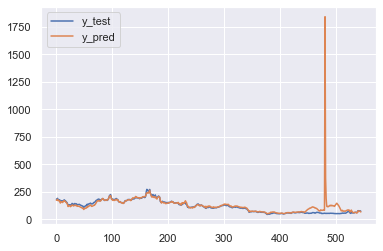

In [26]:
pd.DataFrame(zip(Y_test,y_pred),columns=['y_test','y_pred']).plot()

In [27]:
pre_df.to_csv("ltc_NN.csv")